# FIT5196-S1-2024 Assessment 2

The following notebook provides our answers and working out for Assignment 2 Tasks 1 and 2 for FIT5196 Data Wrangling

Before performing any data cleaning or EDA, we first import necessary libraries

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

## Task 1: Data Cleaning

We now import necessary input files for Task 1

In [2]:
dirty_data_path = "data\Group109_dirty_data.csv"
missing_data_path = "data\Group109_missing_data.csv"
outlier_data_path = "data\Group109_outlier_data.csv"
branch_path = r"data\branches.csv"
edges_path = "data\edges.csv"
nodes_path = r"data\nodes.csv"

dirty_df = pd.read_csv(dirty_data_path)
missing_df = pd.read_csv(missing_data_path)
outlier_df = pd.read_csv(outlier_data_path)
branch_df = pd.read_csv(branch_path)
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)

### Task 1.1 Detecting and Fixing Errors in dirty_data.csv 

The general approach that we would be following to identify potential dirty data is listed below. We are generally looking for data anomalies related to:
- integrity constraints
- data entry error
- wrong categorical data
- violation of referential integrity
- duplicated data
- go against value range
- wrong encoding
- wrong representations
- wrong names and numbers

To get a broad understanding of the dirty dataset in `dirty_df` we utilise `info()`, `describe()`, and `head()` functions in `pandas` library to understand the data type of each feature, gain more insight into the value range for numerical features and also have a view of what the raw data looks like

In [3]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [4]:
dirty_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,480.712900,-30.753946,143.504403,0.102000,8.629274,13.877162
std,254.034843,25.337436,16.299630,0.302951,1.596279,2.378285
min,31.750000,-37.827188,-37.822231,0.000000,3.613000,5.646222
25%,300.625000,-37.818738,144.952786,0.000000,7.750500,12.660927
50%,434.250000,-37.811755,144.963914,0.000000,8.639500,13.849738
75%,633.250000,-37.804505,144.980037,0.000000,9.633500,15.229668
max,1361.500000,145.005221,145.015449,1.000000,13.735000,20.088572


In [5]:
dirty_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX02948,2018-03-11,10:11:49,Breakfast,BK,"[('Cereal', 4), ('Eggs', 3), ('Coffee', 1), ('...",206.00,-37.805040,144.963243,0,7.615,14.403915
1,ORDC07988,2018-03-06,10:01:41,Breakfast,NS,"[('Coffee', 2), ('Cereal', 5), ('Eggs', 10), (...",437.00,-37.815989,144.983435,0,8.914,13.807773
2,ORDI00568,2018-07-05,14:05:04,Lunch,NS,"[('Fries', 6), ('Chicken', 5), ('Salad', 7), (...",507.40,-37.806281,144.941960,1,9.316,15.028384
3,ORDI06756,2018-04-23,11:43:05,Breakfast,NS,"[('Coffee', 3), ('Pancake', 6), ('Eggs', 3)]",234.00,-37.822259,144.946977,0,9.975,15.217270
4,ORDX01986,2018-04-29,11:53:14,Breakfast,BK,"[('Coffee', 6), ('Cereal', 1), ('Eggs', 2), ('...",134.25,-37.815950,144.986001,0,6.038,13.677500


As stated in the assignment brief, we will not be looking for any fixing values within the following columns as there are no errors in dirty data for them:
- `order_id`
- `time`
- the numeric quantity in `order_items`
- `delivery_fee`

#### Cleaning Branch Code

We first take a look at what unique values are stored in `branch_code` by using the `value_counts()` function

In [6]:
dirty_df['branch_code'].value_counts()

TP    169
NS    163
BK    144
ns     11
tp      7
bk      6
Name: branch_code, dtype: int64

From the output above, we can see that some of the branch codes have been inputted in the wrong representation. Instead of being inputted in all uppercase, some of the values are shown as lowercase (e.g. ns, tp and bk). We will need to perform data transformation on this column to convert all values to uppercase letters. We leverage the function `apply` function in `pandas` to convert all branch codes to uppercase using the inbuilt string function `str.upper`.

In [7]:
dirty_df['branch_code'] = dirty_df['branch_code'].apply(str.upper)

If we check the value counts, we are now able to see all branch codes having all uppercase

In [8]:
dirty_df['branch_code'].value_counts()

TP    176
NS    174
BK    150
Name: branch_code, dtype: int64

#### Cleaning Date Column

According to the assignment brief, all string date values in column `date` should be in the format YYYY-MM-DD. We can verify if this is the case by using `pd.to_datetime` function on the `date` column and see if all date values fit the format `%Y-%m-%d`

In [9]:
try:
    pd.to_datetime(dirty_df['date'], format='%Y-%m-%d', errors='raise')
except ValueError as e:
    print("Error occurred. Unable to convert the following date:")
    print(e)
else:
    print('No error')

Error occurred. Unable to convert the following date:
time data 06-10-2018 doesn't match format specified


As we can see, not all the date values are in the correct format. Therefore we will have to iterate through each date value and determine which one of the follow formats the date value can be in. We use the following `pd.to_datetime` format for each date format:
1. YYYY-MM-DD: `format='%Y-%m-%d'`
2. DD-MM-YYYY: `format='%d-%m-%Y'`
3. YYYY-DD-MM: `format='%Y-%d-%m'`


In [10]:
for index, row in dirty_df.iterrows():
    new_row = pd.Series(row)

    # Check if date fits the format YYYY-MM-DD
    try:
        new_row = pd.to_datetime(row['date'], format='%Y-%m-%d')
    except:
        # If not, check if it fits the format YYYY-DD-MM
        try: 
            new_row = pd.to_datetime(row['date'], format='%Y-%d-%m')
        # Else, check if it fits the format DD-MM-YYYY
        except:
            new_row = pd.to_datetime(row['date'], format='%d-%m-%Y')
    dirty_df.at[index, 'date'] = new_row

dirty_df['date'] = pd.to_datetime(dirty_df['date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

Now if we run the date format checker once again, we find that all dates in `dirty_df` are now in the correct format

In [11]:
try:
    pd.to_datetime(dirty_df['date'], format='%Y-%m-%d', errors='raise')
except ValueError as e:
    print("Error occurred. Unable to convert the following date:")
    print(e)
else:
    print('No error')

No error


#### Clean Order Type

Now we evaluate the `order_type` column. Since we know for certain that the time column does not have any errors in it, we can verify if the `order_type` is correct according to the time. The order should be the following according to the times:
- 08:00:00 - 12:00:00 = Breakfast
- 12:00:01 - 16:00:00 = Lunch
- 16:00:01 - 20:00:00 = Dinner

To check if the correct order type has been inputted, we create the function `find_order-type`. It looks through each string time value in `time` column, converts this string into datetime format. Then we check the timestamp to see if it fits within the Breakfast, Lunch or Dinner time slots

In [12]:
def find_order_type(time):
    timestamp = pd.to_datetime(time, format='%H:%M:%S').time()
    if timestamp >= pd.to_datetime('08:00:00').time() and timestamp <= pd.to_datetime('12:00:00').time():
        return 'Breakfast'
    elif timestamp >= pd.to_datetime('12:00:01').time() and timestamp < pd.to_datetime('16:00:00').time():
        return 'Lunch'
    elif timestamp >= pd.to_datetime('16:00:01').time() and timestamp <= pd.to_datetime('20:00:00').time():
        return 'Dinner'
    else:
        return 'Error'

In [13]:
# output values where calculated order type does not match the order type in the dataset
dirty_df[dirty_df['time'].apply(find_order_type) != dirty_df['order_type']].head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
14,ORDC09610,2018-10-06,17:07:36,Lunch,NS,"[('Fish&Chips', 5), ('Shrimp', 2), ('Pasta', 4)]",393.0,-37.826028,144.984514,0,9.578,17.378357
19,ORDC06273,2018-09-05,16:06:45,Lunch,NS,"[('Pasta', 5), ('Shrimp', 10), ('Fish&Chips', ...",1361.5,-37.814936,144.927351,0,10.813,16.896152
20,ORDB10659,2018-04-20,11:32:57,Dinner,TP,"[('Eggs', 7), ('Coffee', 10), ('Cereal', 6), (...",597.5,-37.818900,144.952797,0,8.576,11.161592
37,ORDK01676,2018-03-16,10:21:58,Dinner,BK,"[('Eggs', 2), ('Pancake', 2)]",92.5,-37.801158,144.957692,0,8.326,13.278789
54,ORDB10190,2018-10-08,17:17:44,Breakfast,TP,"[('Fish&Chips', 2), ('Salmon', 2)]",152.0,-37.813657,144.957285,0,8.419,13.088105


As shown above, there are orders in which order type has been incorrectly inputted according to the time. We can fix this issue by performing the following

In [14]:
dirty_df['order_type'] = dirty_df['time'].apply(find_order_type)

If we check again, now the order types are in the correct types

In [15]:
# output values where calculated order type does not match the order type in the dataset
(dirty_df['time'].apply(find_order_type) != dirty_df['order_type']).sum()

0

#### Cleaning Branch and Customer Locations

We determine if the branch and customer locations in `dirty_df` can be accurately found in the provided Graph in `nodes.csv`. To do this, we create `check_branch_nodes` and `check_customer_nodes` functions. `check_branch_nodes` uses the branch codes specified in the order in `dirty_df` and finds if these codes can be found within the `branches.csv` file using `branches_df`. If the branch code is valid, the longitude and latitude values of the branch should be able to be retrieved and should match an instance in the `nodes.csv` content which is stored in `nodes_df`. If the node is found, return True. Else, False.

We perform a similar process to verify if customer nodes exist. We extract the customer latitude and longitude values from each order and check the `nodes_df` dataframe if there is a matching set of coordinates found in its dataset. If the node is found, return True. Else, False.

In [16]:
# check if customer node exists
def check_customer_nodes(row):
    customer_node = nodes_df[(nodes_df['lat'] == row['customer_lat']) & (nodes_df['lon'] == row['customer_lon'])]

    if customer_node.empty:
        return True
    else:
        return False

# check if branch node exists
def check_branch_nodes(row):
    branch_lat = branch_df[branch_df['branch_code'] == row['branch_code']]['branch_lat'].values[0]
    branch_lon = branch_df[branch_df['branch_code'] == row['branch_code']]['branch_lon'].values[0]

    branch_node = nodes_df[(nodes_df['lat'] == branch_lat) & (nodes_df['lon'] == branch_lon)]

    if branch_node.empty:
        return True 
    else:
        return False

In [17]:
# Retrieve the number of rows where the customer node does not exist in the nodes.csv file
dirty_df.apply(check_branch_nodes, axis=1).sum()

0

From the above results, we can see that all the branch nodes are accounted for and each node exists in the provided graph

In [18]:
dirty_df.apply(check_customer_nodes, axis=1).sum()

41

When checking for customer nodes, it is evident that there are 41 instances of orders where we are unable to identify the node in the graph according to the provided customer longitude and latitude values. To investigate further into the cause of this issue, let's output the first 15 instances where this is the case.

In [19]:
dirty_df[dirty_df.apply(check_customer_nodes, axis=1)][['customer_lat', 'customer_lon']].head(15)

,customer_lat,customer_lon
5,37.814994,144.960538
7,37.816395,144.938170
12,37.816482,144.964894
25,37.824000,144.953766
35,37.811124,145.001788
38,37.799866,145.002800
45,37.814037,144.985480
49,37.813155,144.968360
52,37.804832,144.950241
53,37.812135,144.962341


From the outputted data above, we can see 2 prominent errors within the data:
1. <b>There are some instances in which customer latitude has a missing negative symbol at the front. </b>

Take the row at index 5 for example where latitude and longitude are 37.814994 and 144.960538 respectively. If we look at the `nodes.csv` file:

In [20]:
index = 5
# modify latitude by multiplying it by -1
lat = dirty_df.loc[index,]['customer_lat'] * -1
lon = dirty_df.loc[index,]['customer_lon']

# check if the modified latitude exists in the nodes.csv file
nodes_df[(nodes_df['lat'] == lat) & (nodes_df['lon'] == lon)]

,node,lat,lon
3793,6167489464,-37.814994,144.960538


As shown above, the following node exists in the graph when the latitude value is included with a negative value.


2. <b>There are some instance in which customer longitude and customer latitude are placed incorrectly and have been swapped with one another</b>

Take row at index 135 for example where latitude and longitude are 145.005221 and -37.817570 respectively. It is evident that these have been inputted incorrectly and the values have swapped over.

In [21]:
index = 135
# modify latitude by multiplying it by -1
lat = dirty_df.loc[index,]['customer_lon']
lon = dirty_df.loc[index,]['customer_lat']

# check if the modified latitude exists in the nodes.csv file
nodes_df[(nodes_df['lat'] == lat) & (nodes_df['lon'] == lon)]

,node,lat,lon
9191,1463620803,-37.81757,145.005221


As shown above, the following node exists in the graph when the customer latitude and longitude values are swapped over.

We fix the issue with customer longitude and latitude values using the following custom function `find_customer_node` which first tries to find the node of the customer based on the given latitude and longitude values. If it is unable to do so, we try the following approaches next:
1. Multiply the latitude value by negative and check to see if these coordinates exist in `nodes_df`. Else;
2. Swap the longitude and latitude values and check to see if these coordinates exist in `nodes_df`

If none of these approaches allow us to find a node, we will raise a `ValueError`

In [22]:
def calc_customer_node(row):
    cus_lat = row['customer_lat']
    cus_lon = row['customer_lon']
    customer_node = nodes_df[(nodes_df['lat'] == cus_lat) & (nodes_df['lon'] == cus_lon)]

    # If the customer node does not exist, check for misinput of latitude and longitude values
    if customer_node.empty:
        # multiply the latitude by -1 
        customer_node = nodes_df[(nodes_df['lat'] == -cus_lat) & (nodes_df['lon'] == cus_lon)]
        # If the customer node still does not exist, try swapping the latitude and longitude values
        if customer_node.empty:
            customer_node = nodes_df[(nodes_df['lat'] == cus_lon) & (nodes_df['lon'] == cus_lat)]

    # If the customer node still does not exist, raise an error
    if customer_node.empty:
        raise ValueError("Customer node does not exist in the nodes.csv file")
    
    return customer_node.iloc[0]['lat'], customer_node.iloc[0]['lon']


In [23]:
dirty_df['customer_coords'] = dirty_df.apply(calc_customer_node, axis=1)
dirty_df[['customer_lat', 'customer_lon']] = pd.DataFrame(dirty_df['customer_coords'].to_list(), index=dirty_df.index)

dirty_df.drop(columns=['customer_coords'], inplace=True)

In [24]:
dirty_df.apply(check_customer_nodes, axis=1).sum()

0

When we run `check_customer_nodes` again we can see that all of the coordinates can be accounted for and found in the `nodes.csv` file

#### Clean Distance To Customer KM

Now we check if `distance_to_customer_KM` is correct. To start with this, we utilise `Graph()` function from `networkx` library to construct a Graph based on the nodes, edges provided by the Assignment brief in `nodes.csv` and `edges.csv` respectively

In [25]:
G = nx.Graph()
G.add_nodes_from(nodes_df['node'])
for index, row in edges_df.iterrows():
    G.add_edge(row['u'], row['v'], weight=row['distance(m)'])

In [26]:
def find_branch_node(row):
    branch_lat = branch_df[branch_df['branch_code'] == row['branch_code']]['branch_lat'].values[0]
    branch_lon = branch_df[branch_df['branch_code'] == row['branch_code']]['branch_lon'].values[0]

    branch_node = nodes_df[(nodes_df['lat'] == branch_lat) & (nodes_df['lon'] == branch_lon)]

    return branch_node

def find_shortest_path(row):
    cus_lat = row['customer_lat']
    cus_lon = row['customer_lon']
    customer_node = nodes_df[(nodes_df['lat'] == cus_lat) & (nodes_df['lon'] == cus_lon)]
    
    branch_node = find_branch_node(row)

    # Find the shortest path between the customer node and the branch node
    try:
        # calculates the shortest path using djikstra's algorithm in M
        shortest_path = nx.shortest_path_length(G, source=customer_node['node'].values[0], target=branch_node['node'].values[0], weight='weight')

        # calculate to KM
        shortest_path = shortest_path/1000
    except nx.NetworkXNoPath:
        raise ValueError("No path exists between the customer node and the branch node")
    
    return shortest_path

In [27]:
dirty_df['shortest_path'] = dirty_df.apply(find_shortest_path, axis=1)

In [28]:
dirty_df[dirty_df['distance_to_customer_KM'] != dirty_df['shortest_path']][['distance_to_customer_KM', 'shortest_path']].head()

,distance_to_customer_KM,shortest_path
1,8.914,8.624
11,8.330,7.699
15,8.667,7.938
18,8.245,8.787
22,5.435,11.912


Once we have correctly calculated the shortest distance to the customer according to Djikstra's algorithm, we replace the data in `distance_to_customer_KM` column with the correct distance data in `shortest_path` column

In [29]:
dirty_df['distance_to_customer_KM'] = dirty_df['shortest_path']
dirty_df.drop(columns=['shortest_path'], inplace=True)

#### Clean dirty data in  `order_price` and item names in `order_items`

Now we check if the items orders is appropriate according to the time of day. For example:
- Eggs, Coffee and Cereal in the morning

In [30]:
dirty_df['order_items'] = dirty_df['order_items'].apply(eval)
outlier_df['order_items'] = outlier_df['order_items'].apply(eval)

In [31]:
CORRECT_MEAL_ITEMS = {
    "Breakfast": set(),
    "Lunch": set(),
    "Dinner": set()
}

for index, row in outlier_df.iterrows():
    for item, number in row['order_items']:
        if item not in CORRECT_MEAL_ITEMS[row['order_type']]:
            CORRECT_MEAL_ITEMS[row['order_type']].add(item)

print("Meal Items in Outlier Data:\n")

for key in CORRECT_MEAL_ITEMS.keys():
    print(f'{key} items:')
    print(sorted(CORRECT_MEAL_ITEMS[key]))
    print()

Meal Items in Outlier Data:

Breakfast items:
['Cereal', 'Coffee', 'Eggs', 'Pancake']

Lunch items:
['Burger', 'Chicken', 'Fries', 'Salad', 'Steak']

Dinner items:
['Fish&Chips', 'Pasta', 'Salmon', 'Shrimp']



In [32]:
meal_items = {
    "Breakfast": set(),
    "Lunch": set(),
    "Dinner": set()
}

for index, row in dirty_df.iterrows():
    for item, number in row['order_items']:
        if item not in meal_items[row['order_type']]:
            meal_items[row['order_type']].add(item)

print("Meal Items in Dirty Data:\n")

for key in meal_items.keys():
    print(f'{key} items:')
    print(sorted(meal_items[key]))
    print()

Meal Items in Dirty Data:

Breakfast items:
['Burger', 'Cereal', 'Chicken', 'Coffee', 'Eggs', 'Fries', 'Pancake', 'Salmon', 'Shrimp']

Lunch items:
['Burger', 'Cereal', 'Chicken', 'Coffee', 'Eggs', 'Fries', 'Pancake', 'Pasta', 'Salad', 'Salmon', 'Shrimp', 'Steak']

Dinner items:
['Burger', 'Cereal', 'Coffee', 'Eggs', 'Fish&Chips', 'Fries', 'Pancake', 'Pasta', 'Salad', 'Salmon', 'Shrimp']



As we can see from above, there are repeating meal items that can be found between different meal items such as 'Burger', 'Cereal' and 'Chicken'

Run this code to identify all the menu items provided

In [33]:
MENU_ITEMS = ['Cereal',
 'Eggs',
 'Coffee',
 'Pancake',
 'Fries',
 'Chicken',
 'Salad',
 'Burger',
 'Salmon',
 'Shrimp',
 'Fish&Chips',
 'Pasta',
 'Steak']

def create_order_dict(row):
    order_mapping = {item: index for index, item in enumerate(MENU_ITEMS)}
    order = [0 for _ in MENU_ITEMS]
    for item in row['order_items']:
        order_index = order_mapping[item[0]]
        order[order_index] += item[1]
    return order

We can use the clean data in missing_data.csv to determine the correct menu item price

In [34]:
missing_df['order_items'] = missing_df['order_items'].apply(eval)

In [35]:
coef_matrix = np.array(missing_df.apply(create_order_dict, axis=1).tolist())
constants = np.array(missing_df['order_price'].tolist())
prices, residuals, _, _ = np.linalg.lstsq(coef_matrix, constants, rcond=None)
prices = prices.round(2)
for item, price in zip(MENU_ITEMS, prices):
    print(f'{item}: ${price}')

Cereal: $21.0
Eggs: $22.0
Coffee: $7.5
Pancake: $24.25
Fries: $12.0
Chicken: $32.0
Salad: $17.2
Burger: $31.0
Salmon: $41.0
Shrimp: $54.0
Fish&Chips: $35.0
Pasta: $27.5
Steak: $45.0


From what we have calculated using the least squares regression to solve the multivariate equations, we can see the correct prices for all menu items

In [36]:
residuals.round(2)

array([0.])

The residual sum of sequares for the least squares regression is equal to zero when rounded to two decimal places. This means that the model is very close to a perfect fit to the data and can be accurately used to determine item prices

We double check to see if the item price has been calculated correctly by finding the total order price for each order

In [37]:
ITEM_PRICES = {item:price for item, price in zip(MENU_ITEMS, prices)}

def calculate_order_price(row):
    order_price = 0
    for item in row['order_items']:
        order_price += item[1] * ITEM_PRICES[item[0]]
    order_price = round(order_price, 2)
    return order_price

In [38]:
sum(missing_df['order_price'] != missing_df.apply(calculate_order_price, axis=1))

0

As shown from above, we can be certain that all the item prices have been correctly calculated. Now we can use our calculated item prices to find the correct order prices within the `dirty_data.csv` file

In [39]:
dirty_df['calc_order_price'] = dirty_df.apply(calculate_order_price, axis=1)
dirty_df[dirty_df['order_price'] != dirty_df['calc_order_price']].head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,calc_order_price
8,ORDJ01725,2018-11-21,18:49:00,Dinner,TP,"[(Salmon, 7), (Fish&Chips, 10), (Pasta, 6), (S...",387.6,-37.810778,144.939145,0,10.243,14.296622,856.0
21,ORDX04933,2018-10-24,17:48:10,Dinner,BK,"[(Shrimp, 10), (Fish&Chips, 4), (Burger, 5), (...",1104.5,-37.811205,144.961921,0,7.749,13.712141,1122.0
51,ORDZ04491,2018-01-15,08:20:16,Breakfast,NS,"[(Cereal, 7), (Fries, 4)]",235.0,-37.815102,144.923050,1,11.071,8.030919,195.0
59,ORDY01354,2018-05-27,12:43:56,Lunch,TP,"[(Shrimp, 6), (Steak, 1), (Salad, 10)]",289.0,-37.821142,145.015388,0,12.055,16.623301,541.0
88,ORDY10473,2018-09-28,16:57:27,Dinner,TP,"[(Pasta, 1), (Salmon, 3)]",399.6,-37.806308,144.949894,0,9.546,13.909831,150.5
91,ORDI10930,2018-10-31,17:58:18,Dinner,NS,"[(Salmon, 3), (Fish&Chips, 10), (Salad, 3)]",635.0,-37.807321,144.973390,0,7.026,13.389700,524.6
95,ORDI02286,2018-07-03,14:05:04,Lunch,NS,"[(Pasta, 7), (Burger, 7)]",301.0,-37.809753,144.963887,0,7.431,12.838643,409.5
110,ORDX03709,2018-06-18,13:34:38,Lunch,BK,"[(Fries, 7), (Salad, 5)]",596.0,-37.823040,145.007147,0,4.633,10.199590,170.0
118,ORDZ05102,2018-10-05,17:07:36,Dinner,NS,"[(Salmon, 10), (Fish&Chips, 5), (Shrimp, 5), (...",600.6,-37.808465,144.955813,0,8.055,14.038606,882.5
120,ORDA05737,2018-01-23,08:40:33,Breakfast,BK,"[(Cereal, 4), (Eggs, 1)]",242.0,-37.818995,144.954145,0,8.699,13.617509,106.0


From what we can see above, there are instances in `dirty_df` where the order_price does not align with the order price we have calculated. This may be because the order price has been inputted incorrectly or that the order item meals have been inputted incorrectly. According to the assignment brief, there can only be one data anomaly per row, so either the order price is wrong or that order item meal is wrong, never both. We can use this knowledge to deduct what data point needs to be fixed. For instance, the row at index 51 (look at table above) has 'Fries' included in their order, but we know that it Fries is not available during Breakfast hours. So that means the menu item has been inputted correctly, not the item price. 

Therefore, our approach to rectify data in `order_items` and `order_price` is as such:
1. First check if there are any order item meals that have been inputted incorrectly. 

In such a case, we know that the order price, order item numbers and the other order item meals are correct. Therefore we can construct an algebraic equation to solve for the unknown item price which directly related to the item meal. Let's say that we have the order so we have the order_items = [(Cereal, 7), (Fries, 4)] and order_price = 235.0 where `Fries` is the incorrect value that we want to find the correct meal of. According to `ITEM_PRICES` we know the price of Cereal is $21, and so we can construct our algebraic equation as such: 
$$
 \text{Cereal}*\text{amount} + \text{unknown meal}*\text{amount} = \text{order price}
$$
$$
 21*7 + \text{unknown meal}*4 = 235
$$
Then we can rearrange the equation to find the cost of the unknown meal:
$$
 \text{unknown meal} = 22.0
$$

If we refer back to `ITEM_PRICES` we can see that the meal item that matches this price are Eggs. We know this is the correct meal item since Eggs are typically served during breakfast time.

In a scenario where all `order_items` meals are correct according to `order_type`, we move on to step 2.

2. If meals are all correct in `order_items`, then the value inputted in `order_price` is incorrect. We find the correct value by using `ITEM_PRICES` to calculate the cost of the item times the amount and return the sum of these results
    

In [40]:
CORRECT_MEAL_ITEMS

{'Breakfast': {'Cereal', 'Coffee', 'Eggs', 'Pancake'},
 'Lunch': {'Burger', 'Chicken', 'Fries', 'Salad', 'Steak'},
 'Dinner': {'Fish&Chips', 'Pasta', 'Salmon', 'Shrimp'}}

In [41]:
PRICES_ITEM = {price:item for item, price in ITEM_PRICES.items()}

In [42]:
PRICES_ITEM

{21.0: 'Cereal',
 22.0: 'Eggs',
 7.5: 'Coffee',
 24.25: 'Pancake',
 12.0: 'Fries',
 32.0: 'Chicken',
 17.2: 'Salad',
 31.0: 'Burger',
 41.0: 'Salmon',
 54.0: 'Shrimp',
 35.0: 'Fish&Chips',
 27.5: 'Pasta',
 45.0: 'Steak'}

In [43]:
CORRECT_MEAL_ITEMS

{'Breakfast': {'Cereal', 'Coffee', 'Eggs', 'Pancake'},
 'Lunch': {'Burger', 'Chicken', 'Fries', 'Salad', 'Steak'},
 'Dinner': {'Fish&Chips', 'Pasta', 'Salmon', 'Shrimp'}}

In [44]:
temp_df = dirty_df.copy()

In [45]:
for index, row in temp_df.iterrows():
    
    unknown_item_count = 0
    unknown_item_index = -1

    # check how many item meals are unknown
    for data_index, data in enumerate(row['order_items']):
        if data[0] not in CORRECT_MEAL_ITEMS[row['order_type']]:
            unknown_item_count+=1
            unknown_item_index = data_index
    
    # if there is more than one unknown item, raise an error
    if unknown_item_count > 1:
        raise ValueError("More than one unknown item in order")
    

    # if there is one unknown item, calculate the price of the unknown item
    if unknown_item_count == 1:
        order_price = row['order_price']
        for item, number in row['order_items']:
            if item in CORRECT_MEAL_ITEMS[row['order_type']]:
                order_price -= ITEM_PRICES[item] * number
        item_price = order_price / row['order_items'][unknown_item_index][1]
        item_price = round(item_price,2)
        temp_df.loc[index]['order_items'][unknown_item_index] = (PRICES_ITEM[item_price], row['order_items'][unknown_item_index][1])
    # if there are no unknown items, calculate the price of the total order
    else:
        order_price = calculate_order_price(row)
        temp_df.loc[index, 'order_price'] = order_price

In [46]:
temp_df['calc_order_price'] = temp_df.apply(calculate_order_price, axis=1)
(temp_df['order_price'] != temp_df['calc_order_price']).sum()

0

In [47]:
dirty_df.drop(columns=['calc_order_price'], inplace=True)

#### Cleaning customerHasloyalty

Check if `customerHasloyalty?` is correct. To verify if customerHasloyalty has been calculated correctly. We make use of the correct data in missing_data.csv again to create a logistic regression model to predict the customerHasLoyalty column. This logistic regression model, once generated will be able to correctly calculate the data in dirty_data.csv

In [47]:
def calc_timeOfDay(order_type):
    if order_type == 'Breakfast':
        return 0
    elif order_type == 'Lunch':
        return 1
    elif order_type == 'Dinner':
        return 2

In [48]:
# check to see if pd.datetime.dayofweek is greater than or equal to 5. Monday=0, Sunday=6
temp_df = missing_df.dropna(subset=['date', 'order_type', 'branch_code', 'distance_to_customer_KM', 'delivery_fee'])

In [49]:
temp_df['weekend'] = temp_df['date'].apply(lambda x: pd.to_datetime(x).dayofweek >= 5)
temp_df['time_of_day'] = temp_df['order_type'].apply(calc_timeOfDay)

We convert the categorical values in branch_code into numeric values to construct our logistic regression model

In [50]:
branch_encoder = LabelEncoder()
temp_df['branch_value'] = branch_encoder.fit_transform(temp_df['branch_code'])

In [51]:

# Split your data into features (X) and target variable (y)
X = temp_df[['weekend', 'time_of_day', 'distance_to_customer_KM', 'delivery_fee','branch_value']]  # Features
y = temp_df['customerHasloyalty?']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize logistic regression model
loyalty_log_model = LogisticRegression()

# Train the model
loyalty_log_model.fit(X_train, y_train)

# Predict on test set
y_pred = loyalty_log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00         3

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [52]:
dirty_df['weekend'] = dirty_df['date'].apply(lambda x: pd.to_datetime(x).dayofweek >= 5)
dirty_df['time_of_day'] = dirty_df['order_type'].apply(calc_timeOfDay)
dirty_df['branch_value'] = branch_encoder.transform(dirty_df['branch_code'])


In [53]:
dirty_df['calc_loyalty'] = loyalty_log_model.predict(dirty_df[['weekend', 'time_of_day', 'distance_to_customer_KM', 'delivery_fee', 'branch_value']])

In [54]:
dirty_df[dirty_df['calc_loyalty'] != dirty_df['customerHasloyalty?']][['customerHasloyalty?', 'calc_loyalty']].head(10)

,customerHasloyalty?,calc_loyalty
2,1,0
13,1,0
62,1,0
67,1,0
75,1,0
80,1,0
85,0,1
125,1,0
156,1,0
157,1,0


In [55]:
(dirty_df['calc_loyalty'] != dirty_df['customerHasloyalty?']).sum()

38

From above, we can see that in the original data, customerHasloyaty has been inputted incorrectly for 39 orders. We know that the data is issue as our logisticregression models have a 100% accuracy. Knowing this, we assign the values from `calc_loyalty` to `customerHasloyalty?` to remove the dirty data

In [56]:
dirty_df['customerHasloyalty?'] = dirty_df['calc_loyalty']

To verify that our data has been cleaned property, we create another logistic regression model for the data in `dirty_df` to see if the accuracy of the model is 100%

In [57]:
# Load your dataset
# Assuming your data is stored in a DataFrame called df

# Split your data into features (X) and target variable (y)
X_test = dirty_df[['weekend', 'time_of_day', 'distance_to_customer_KM', 'delivery_fee', 'branch_value']]  # Features
y_test = dirty_df['customerHasloyalty?']  # Target variable

# Predict on test set
y_pred = loyalty_log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00        19

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



Now we can save our clean df to a csv file

In [58]:
dirty_df_sol = dirty_df.drop(columns=['weekend', 'time_of_day', 'branch_value', 'calc_loyalty'])

In [59]:
dirty_df_sol.to_csv('output/109_dirty_data_solution.csv', index=False)

## Imputing data

In [60]:
outlier_sol_df = pd.read_csv(r'output\109_Task1_outliers.csv')

In [61]:
temp_df = missing_df.dropna(subset=['date', 'order_type', 'branch_code', 'distance_to_customer_KM', 'delivery_fee'])

temp_outlier_df = outlier_sol_df.dropna(subset=['date', 'order_type', 'branch_code', 'distance_to_customer_KM', 'delivery_fee'])

In [62]:
temp_df['weekend'] = temp_df['date'].apply(lambda x: pd.to_datetime(x).dayofweek >= 5)
temp_df['time_of_day'] = temp_df['order_type'].apply(calc_timeOfDay)
temp_df['branch_value'] = branch_encoder.transform(temp_df['branch_code'])

In [63]:
model_training_df = pd.concat([temp_df])

In [105]:
# Split your data into features (X) and target variable (y)
X = model_training_df[['weekend', 'time_of_day', 'distance_to_customer_KM','branch_value', 'customerHasloyalty?']]  # Features
y = model_training_df['delivery_fee']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

delivery_fee_model = LinearRegression()
delivery_fee_model.fit(X_train, y_train)

y_pred = delivery_fee_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")


R^2 Score: 0.9404256875454788


Since there are instances in missing_df where multiple features are missing (e.g. order at index 0 where branch_code and distance_to_customer_KM), we will not be able to currently utilise 

In [107]:
fee_missing_df = missing_df[missing_df['delivery_fee'].isna()][['weekend', 'time_of_day', 'distance_to_customer_KM', 'branch_code', 'customerHasloyalty?', 'delivery_fee']]

In [108]:
fee_missing_df['weekend'] = fee_missing_df['date'].apply(lambda x: pd.to_datetime(x).dayofweek >= 5)
fee_missing_df['time_of_day'] = fee_missing_df['order_type'].apply(calc_timeOfDay)
fee_missing_df['branch_value'] = branch_encoder.transform(fee_missing_df['branch_code'])

In [112]:
fee_missing_df['calc_delivery_fee'] = delivery_fee_model.predict(fee_missing_df[['weekend', 'time_of_day', 'distance_to_customer_KM', 'branch_value', 'customerHasloyalty?']])

In [116]:
fee_missing_df.head()

,weekend?,timeofday,distance_to_customer_KM,branch_code,customerHasloyalty?,delivery_fee,branch_value,calc_delivery_fee
7,False,1,9.544,BK,0,NaN,0,15.775457
36,False,2,8.241,BK,0,NaN,0,15.268364
56,False,1,9.280,TP,0,NaN,2,12.679113
66,False,0,7.284,BK,0,NaN,0,12.861145
69,False,0,7.754,BK,0,NaN,0,13.312467


In [117]:
missing_df_sol = missing_df.copy()
for index, row in fee_missing_df.iterrows():
    missing_df_sol.loc[index, 'delivery_fee'] = row['calc_delivery_fee']

In [119]:
missing_df['delivery_fee'].isna().sum()

0

In [124]:
missing_df_sol.to_csv('output/109_missing_data_solution.csv', index=False)

## Detecting and Removing Outlier Rows in outlier_data.csv

In [65]:
outlier_data_path = "data\Group109_outlier_data.csv"
df_outlier = pd.read_csv(outlier_data_path) # Reading the Data file path 


In [66]:
df_outlier.shape
# df_outlier.head()

(500, 12)

<Figure size 720x432 with 0 Axes>

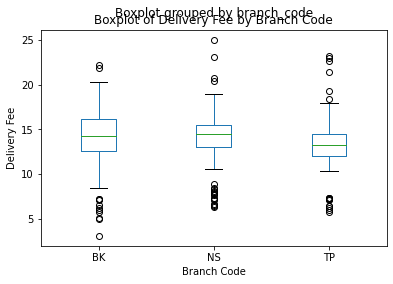

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_outlier.boxplot(column='delivery_fee', by='branch_code', grid=False) #Creatign a boxplot for delivery_fee based on the branch_code
plt.title('Boxplot of Delivery Fee by Branch Code')
plt.xlabel('Branch Code')
plt.ylabel('Delivery Fee')
plt.xticks()
plt.show()

The distribution of delivery fees among the three branch codes—BK, NS, and TP—is shown in the boxplot. The median delivery fee for each branch is roughly 14–15, with BK and NS having somewhat higher medians than TP. The interquartile range (IQR) of delivery_fee, varies from 11 to 18 for BK, 12 to 17 for NS, and 11 to 16 for TP. This range is largely stable between branches. For every branch, the whiskers, which show the range within 1.5 times the IQR from the quartiles, roughly span from 8 to 20. Interestingly, there are a considerable number of outliers in every branch. The outliers for BK and NS are mainly on the higher end, above 20, In contrast, TP displays a balanced distribution of outliers, with those outside of 8 and those over 18. These outliers point to sporadic departures from the usual range of delivery fees, which calls for additional research to determine the root causes. With a few noteworthy outliers, the data generally shows that the branches' delivery costs are consistent.

In [71]:
def iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    l_bound = q1 - 1.5 * IQR
    u_bound = q3 + 1.5 * IQR
    filtered_outlier = df[(df[column] < l_bound) | (df[column] > u_bound)]
    return filtered_outlier

Function named iqr whose purpose is to use the Interquartile Range (IQR) method to find outliers in a delivery_fee. It computes the IQR as well as the first and third quartiles (q1 and q3). It calculates lower and upper boundaries for outlier. The Data is then filtered so that only rows with values in the designated column falling outside of these ranges are kept.

In [72]:
while True:
    outliers = iqr(df_outlier, 'delivery_fee')
    if outliers.empty:
        break
    df_outlier = df_outlier.drop(outliers.index)
df_outlier.shape
print(len(outliers))

0


The detected outliers are dropped from the original DataFrame. Ultimately, it outputs the form of the filtered DataFrame and returns it with no outliers. and the shape of the dataframe is also printed.

<Figure size 720x432 with 0 Axes>

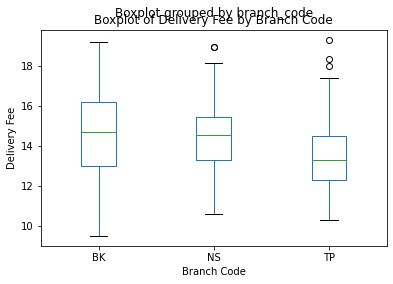

In [73]:
plt.figure(figsize=(10, 6))
df_outlier.boxplot(column="delivery_fee",by="branch_code",grid=False)
plt.title('Boxplot of Delivery Fee by Branch Code')
plt.xlabel('Branch Code')
plt.ylabel('Delivery Fee')
plt.xticks()
plt.show()

from the above boxplot, almost 80% of the outliers have been removed from the dataframe.

In [74]:
df_outlier.to_csv("109_Task1_outliers.csv", index=False) # Writing the removed dataframe to the csv file